In [3]:
!pip install google-colab-patches

ERROR: Could not find a version that satisfies the requirement google-colab-patches (from versions: none)
ERROR: No matching distribution found for google-colab-patches


In [2]:
pip install google-colab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.4 MB/s eta 0:00:00


In [6]:

import torch
import torchvision
import torchvision.transforms.functional as F
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [7]:
model=torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 126MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [8]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane','bus','train','truck', 'boat',
    'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball',
    'bat', 'baseball', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana']



In [11]:
def detect_objects(image_path,confidence_threshold=0.5):
  image=cv2.imread(image_path)
  if image is None:
    print("Image not found")
    return None
  original_image=image.copy()

  image_tensor=F.to_tensor(image)
  with torch.no_grad():
    predictions=model([image_tensor])
    boxes=predictions[0]['boxes'].cpu().numpy()
    labels=predictions[0]['labels'].cpu().numpy()
    scores=predictions[0]['scores'].cpu().numpy()

  for i,box in enumerate(boxes):
    if scores[i]>confidence_threshold:
      label=COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
      score=scores[i]

      start_point=(int(box[0]),int(box[1]))
      end_point=(int(box[2]),int(box[3]))
      cv2.rectangle(original_image,start_point,end_point,(0,255,0),2)
      cv2.putText(original_image,f"{label}:{score:.2f}",(start_point[0],start_point[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),2)
  return original_image


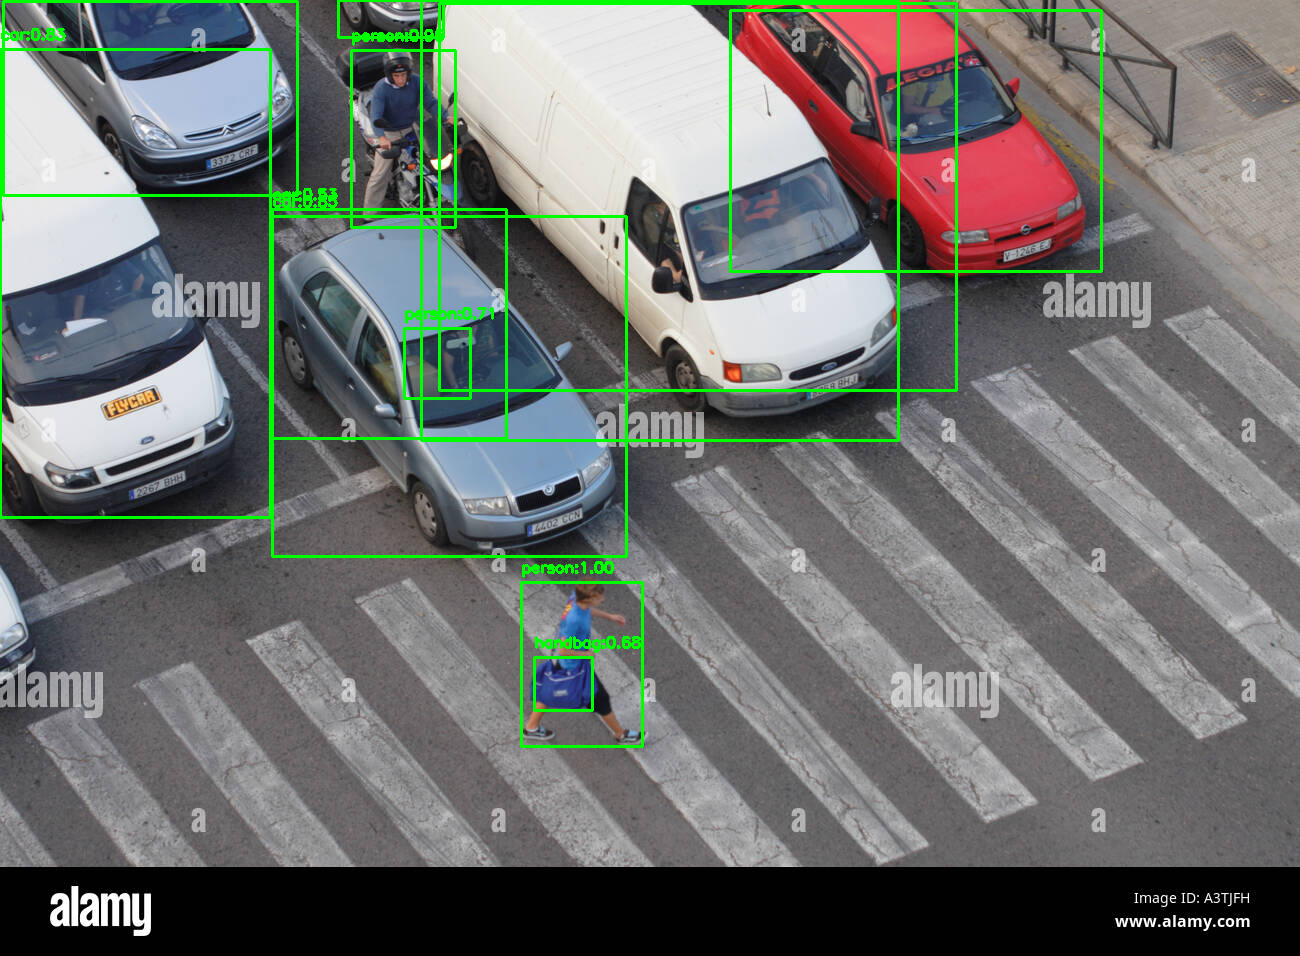

In [14]:
# Example usage:
image_path = '/content/car_bike.jpg'  # Replace this with the correct path to your image
output_image = detect_objects(image_path)


if output_image is not None:
    cv2_imshow(output_image)

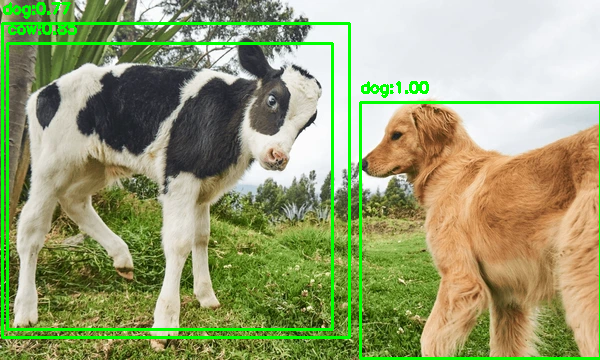

In [15]:
# Example usage:
image_path = '/content/cow_dog.jpg'  # Replace this with the correct path to your image
output_image = detect_objects(image_path)


if output_image is not None:
    cv2_imshow(output_image)